In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
#create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add lat_lngs to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []

In [5]:
#identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city in unique then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

In [6]:
#print hte city count
len(cities)

619

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [8]:
#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create the counters
record_count = 1 
set_count = 1

#loop through all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    #Run an API request for each of the cities
    try:
        
        #parse the json and retrieve data
        city_weather = requests.get(city_url).json()

        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        #convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        #append the city information in to city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lng,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    #if error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that the data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | namatanai
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | ambovombe
Processing Record 7 of Set 1 | salvador
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | aklavik
Processing Record 10 of Set 1 | bomet
Processing Record 11 of Set 1 | maxixe
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | ostrovnoy
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | impfondo
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | zinder
Processing Record 22 of Set 1 | herma

Processing Record 33 of Set 4 | mayumba
Processing Record 34 of Set 4 | nishihara
Processing Record 35 of Set 4 | namibe
Processing Record 36 of Set 4 | vuktyl
Processing Record 37 of Set 4 | port-gentil
Processing Record 38 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | loandjili
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | sao jose da coroa grande
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | port-cartier
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | leningradskiy
Processing Record 50 of Set 4 | fairbanks
Processing Record 1 of Set 5 | moussoro
Processing Record 2 of Set 5 | monduli
Processing Record 3 of Set 5 | sistranda
Processing Record 4 of Set 5 | petropavlovsk-k

Processing Record 18 of Set 8 | xai-xai
Processing Record 19 of Set 8 | borogontsy
Processing Record 20 of Set 8 | mar del plata
Processing Record 21 of Set 8 | dikson
Processing Record 22 of Set 8 | higuey
City not found. Skipping...
Processing Record 23 of Set 8 | vestmanna
Processing Record 24 of Set 8 | bayanday
Processing Record 25 of Set 8 | najran
Processing Record 26 of Set 8 | beidao
Processing Record 27 of Set 8 | nikolskoye
Processing Record 28 of Set 8 | eregli
Processing Record 29 of Set 8 | faya
Processing Record 30 of Set 8 | kurchum
Processing Record 31 of Set 8 | jardim
Processing Record 32 of Set 8 | parkes
Processing Record 33 of Set 8 | boras
Processing Record 34 of Set 8 | gushikawa
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | saint-louis
Processing Record 37 of Set 8 | butembo
Processing Record 38 of Set 8 | aquidauana
Processing Record 39 of Set 8 | flinders
Processing Record 40 of Set 8 | kamaishi
Processing Record 41 of Set 8 | idrinsko

Processing Record 1 of Set 12 | sayyan
Processing Record 2 of Set 12 | evensk
Processing Record 3 of Set 12 | pochutla
Processing Record 4 of Set 12 | gimli
Processing Record 5 of Set 12 | orotukan
Processing Record 6 of Set 12 | bolshoy tsaryn
City not found. Skipping...
Processing Record 7 of Set 12 | mazagao
Processing Record 8 of Set 12 | san rafael
Processing Record 9 of Set 12 | nome
Processing Record 10 of Set 12 | rameswaram
Processing Record 11 of Set 12 | pacasmayo
Processing Record 12 of Set 12 | tuy hoa
Processing Record 13 of Set 12 | agadez
Processing Record 14 of Set 12 | baiyin
Processing Record 15 of Set 12 | poum
Processing Record 16 of Set 12 | the valley
Processing Record 17 of Set 12 | touros
Processing Record 18 of Set 12 | correntina
Processing Record 19 of Set 12 | colac
Processing Record 20 of Set 12 | teeli
Processing Record 21 of Set 12 | tulghes
Processing Record 22 of Set 12 | barra dos coqueiros
Processing Record 23 of Set 12 | urumqi
Processing Record 24 

In [9]:
len(city_data)

552

In [10]:
#convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,147.9167,147.9167,-10.80,99,99,2.95,RU,2021-10-23 00:46:04
1,Atuona,-139.0333,-139.0333,77.90,79,23,16.69,PF,2021-10-23 00:43:33
2,Namatanai,152.4333,152.4333,85.19,64,94,9.57,PG,2021-10-23 00:46:05
3,Mataura,168.8643,168.8643,71.69,40,99,0.94,NZ,2021-10-23 00:46:05
4,Ponta Do Sol,-17.1000,-17.1000,68.63,67,49,7.74,PT,2021-10-23 00:46:05
5,Ambovombe,46.0833,46.0833,66.25,84,100,12.88,MG,2021-10-23 00:46:06
6,Salvador,-88.9167,-88.9167,75.60,97,100,2.01,SV,2021-10-23 00:43:55
7,Port Macquarie,152.9167,152.9167,81.90,62,0,10.80,AU,2021-10-23 00:45:34
8,Aklavik,-135.0107,-135.0107,34.52,93,100,14.94,CA,2021-10-23 00:46:06
9,Bomet,35.3416,35.3416,53.92,92,20,2.73,KE,2021-10-23 00:46:07


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_df = city_data_df[new_column_order]
city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2021-10-23 00:46:04,147.9167,147.9167,-10.80,99,99,2.95
1,Atuona,PF,2021-10-23 00:43:33,-139.0333,-139.0333,77.90,79,23,16.69
2,Namatanai,PG,2021-10-23 00:46:05,152.4333,152.4333,85.19,64,94,9.57
3,Mataura,NZ,2021-10-23 00:46:05,168.8643,168.8643,71.69,40,99,0.94
4,Ponta Do Sol,PT,2021-10-23 00:46:05,-17.1000,-17.1000,68.63,67,49,7.74
5,Ambovombe,MG,2021-10-23 00:46:06,46.0833,46.0833,66.25,84,100,12.88
6,Salvador,SV,2021-10-23 00:43:55,-88.9167,-88.9167,75.60,97,100,2.01
7,Port Macquarie,AU,2021-10-23 00:45:34,152.9167,152.9167,81.90,62,0,10.80
8,Aklavik,CA,2021-10-23 00:46:06,-135.0107,-135.0107,34.52,93,100,14.94
9,Bomet,KE,2021-10-23 00:46:07,35.3416,35.3416,53.92,92,20,2.73


In [12]:
#create the output file in csv format
output_data_file = "weather_data/cities.csv"

#export the city_data into the csv
city_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
#extract relevant fields from the df for plotting
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

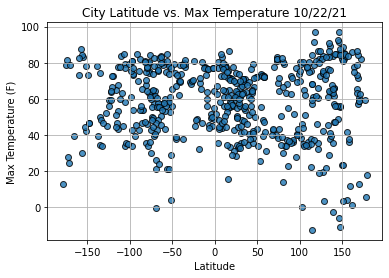

In [33]:
#import the time module
import time

#build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

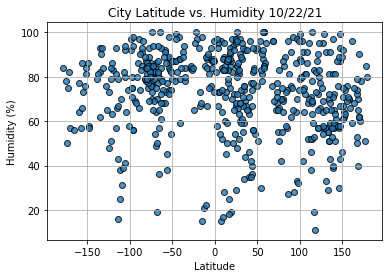

In [34]:
#build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

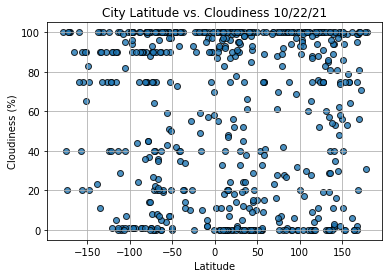

In [35]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

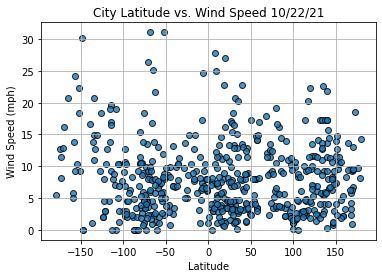

In [36]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed,
            alpha=0.8,
           edgecolor='black',
           linewidths=1,
           marker='o',
           label="Cities")

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()